<a href="https://colab.research.google.com/github/ayoubbensakhria/finance_algo/blob/master/FXPROBOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Ta-Lib

In [13]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

--2022-01-01 22:24:30--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-01-01 22:24:31--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-01-01 22:24:31--  http://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl.s

In [33]:
import math
import pandas_datareader as web
import numpy as np
import talib as ta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

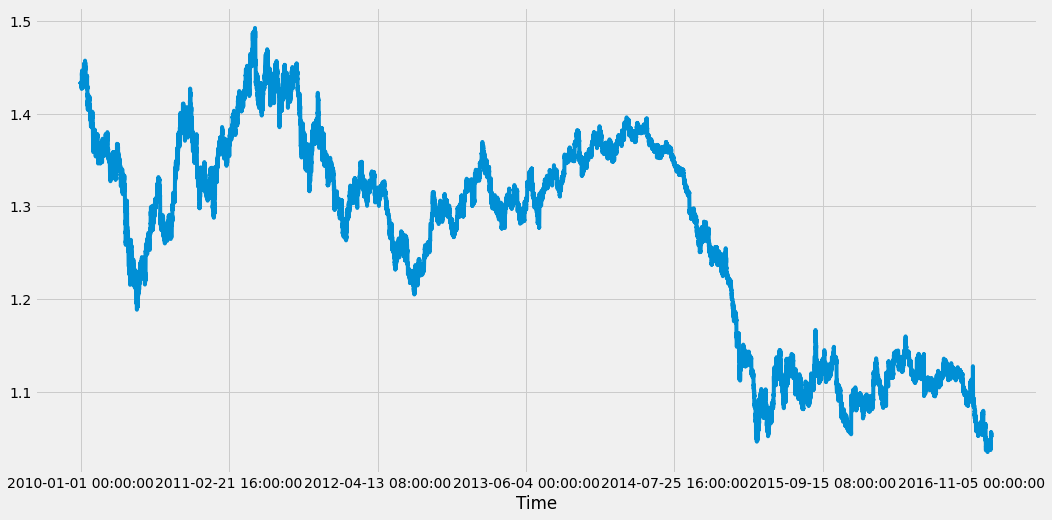

In [35]:
#read data
df = pd.read_csv('/content/drive/MyDrive/data/eurusd30.csv', parse_dates=True)
# #setting index as date because some statsmodels might not work
df.index = pd.to_datetime(df.index)
df.index = df['Time']
#plot
df['Close'].plot(figsize=(16,8))

# Add RSI, MACD, CCI MA indicators to df

In [36]:
# Technical Analysis
DTF = 24*30

SMA_FAST = 50 * DTF
SMA_SLOW = 200 * DTF

RSI_PERIOD = 14 * DTF
RSI_PERIOD240 = 14 * 8 *  DTF # 4 hours is 8* 30 mn

MACD_FAST = 12 * DTF
MACD_SLOW = 26 * DTF
MACD_SIGNAL = 9 * DTF
MACD_SIGNAL240 = 9 * 8 * DTF 


# RSI 30 and 240
df["macd"], df["macd_signal"], df["macd_hist"] = ta.MACD(df['Close'])

# MACD 240
df


,Time,Open,High,Low,Close,Volume,macd,macd_signal,macd_hist
Time,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 00:00:00,1.432840,1.432940,1.432265,1.432840,5.721000e+08,NaN,NaN,NaN
2010-01-01 00:30:00,2010-01-01 00:30:00,1.432825,1.432985,1.432340,1.432785,5.253000e+08,NaN,NaN,NaN
2010-01-01 01:00:00,2010-01-01 01:00:00,1.432885,1.432955,1.432090,1.432870,5.663000e+08,NaN,NaN,NaN
2010-01-01 01:30:00,2010-01-01 01:30:00,1.432735,1.433035,1.432135,1.432655,4.402000e+08,NaN,NaN,NaN
2010-01-01 02:00:00,2010-01-01 02:00:00,1.432900,1.433030,1.432295,1.432860,5.386000e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2016-12-31 21:30:00,2016-12-31 21:30:00,1.051500,1.051500,1.051500,1.051500,0.000000e+00,NaN,NaN,NaN
2016-12-31 22:00:00,2016-12-31 22:00:00,1.051500,1.051500,1.051500,1.051500,0.000000e+00,NaN,NaN,NaN
2016-12-31 22:30:00,2016-12-31 22:30:00,1.051500,1.051500,1.051500,1.051500,0.000000e+00,NaN,NaN,NaN
